In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import xlrd
from PIL import  Image
get_ipython().run_line_magic('matplotlib', 'inline')
import pandas as pd
import seaborn as sns#visualization
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,classification_report,roc_auc_score,make_scorer
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.model_selection import train_test_split
import itertools
import category_encoders as ce
import warnings
warnings.filterwarnings("ignore")
import io
from scipy.stats import chi2_contingency
import plotly.offline as py#visualization
py.init_notebook_mode(connected=True)#visualization
import plotly.graph_objs as go#visualization
import plotly.tools as tls#visualization
import plotly.figure_factory as ff#visualization
%matplotlib inline

In [2]:
#setting the working directory
os.chdir('C:\\Users\\sahil\\Downloads')

In [3]:
# Reading the data 
df = pd.read_excel('Case Study Data scientist Challenge_dataset_Persistent_Non_Persistent (1).xlsx',1)

In [4]:
# Data overview
print('There are total {} number of columns'.format(df.shape[1]))
print('There are total {} number of rows'.format(df.shape[0]))
print('There are total {} missing values'.format(df.isnull().sum().values.sum()))
print('Features are:'.format(df.columns))
print('Unique values in each feature \n ',df.nunique())

There are total 69 number of columns
There are total 3424 number of rows
There are total 0 missing values
Features are:
Unique values in each feature 
  Ptid                              3424
Persistency_Flag                     2
Gender                               2
Race                                 4
Ethnicity                            3
                                  ... 
Risk_Hysterectomy_Oophorectomy       2
Risk_Estrogen_Deficiency             2
Risk_Immobilization                  2
Risk_Recurring_Falls                 2
Count_Of_Risks                       8
Length: 69, dtype: int64


In [5]:
# checking null values present in the data
df.isnull().sum()

Ptid                              0
Persistency_Flag                  0
Gender                            0
Race                              0
Ethnicity                         0
                                 ..
Risk_Hysterectomy_Oophorectomy    0
Risk_Estrogen_Deficiency          0
Risk_Immobilization               0
Risk_Recurring_Falls              0
Count_Of_Risks                    0
Length: 69, dtype: int64

In [6]:
#describing the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3424 entries, 0 to 3423
Data columns (total 69 columns):
 #   Column                                                              Non-Null Count  Dtype 
---  ------                                                              --------------  ----- 
 0   Ptid                                                                3424 non-null   object
 1   Persistency_Flag                                                    3424 non-null   object
 2   Gender                                                              3424 non-null   object
 3   Race                                                                3424 non-null   object
 4   Ethnicity                                                           3424 non-null   object
 5   Region                                                              3424 non-null   object
 6   Age_Bucket                                                          3424 non-null   object
 7   Ntm_Speciality          

# Since there is no missing values in the data so we will proceed with the EDA 

In [13]:
#filtering numerical and categorical and target feature
cat_columns = [i for i in df.columns if df[i].dtypes==object and i not in  ['Persistency_Flag','Ptid']]
num_columns = [i for i in df.columns if i not in cat_columns and i not in ['Persistency_Flag', 'Ptid']]
target_column = 'Persistency_Flag'

In [14]:
df.head()

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
0,P1,Persistent,Male,Caucasian,Not Hispanic,West,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
1,P2,Non-Persistent,Male,Asian,Not Hispanic,West,55-65,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
2,P3,Non-Persistent,Female,Other/Unknown,Hispanic,Midwest,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,Y,N,N,N,N,N,N,N,2
3,P4,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,1
4,P5,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,1


In [15]:
# finding all the unique value in all the features in all categorical data
for i in cat_columns:
    print('The number of distinct catagorical attribute in {} column are {}'.format(i,df[i].nunique()))

The number of distinct catagorical attribute in Gender column are 2
The number of distinct catagorical attribute in Race column are 4
The number of distinct catagorical attribute in Ethnicity column are 3
The number of distinct catagorical attribute in Region column are 5
The number of distinct catagorical attribute in Age_Bucket column are 4
The number of distinct catagorical attribute in Ntm_Speciality column are 36
The number of distinct catagorical attribute in Ntm_Specialist_Flag column are 2
The number of distinct catagorical attribute in Ntm_Speciality_Bucket column are 3
The number of distinct catagorical attribute in Gluco_Record_Prior_Ntm column are 2
The number of distinct catagorical attribute in Gluco_Record_During_Rx column are 2
The number of distinct catagorical attribute in Dexa_During_Rx column are 2
The number of distinct catagorical attribute in Frag_Frac_Prior_Ntm column are 2
The number of distinct catagorical attribute in Frag_Frac_During_Rx column are 2
The numb

In [39]:
# checking the level of data in all the categorical columns
for i in cat_columns:
    print('the number of unique categorical values are {}'.format(df[i].unique()))

the number of unique categorical values are ['Male' 'Female']
the number of unique categorical values are ['Caucasian' 'Asian' 'Other/Unknown' 'African American']
the number of unique categorical values are ['Not Hispanic' 'Hispanic' 'Unknown']
the number of unique categorical values are ['West' 'Midwest' 'South' 'Other/Unknown' 'Northeast']
the number of unique categorical values are ['>75' '55-65' '65-75' '<55']
the number of unique categorical values are ['GENERAL PRACTITIONER' 'Unknown' 'ENDOCRINOLOGY' 'RHEUMATOLOGY'
 'ONCOLOGY' 'PATHOLOGY' 'OBSTETRICS AND GYNECOLOGY'
 'PSYCHIATRY AND NEUROLOGY' 'ORTHOPEDIC SURGERY'
 'PHYSICAL MEDICINE AND REHABILITATION' 'SURGERY AND SURGICAL SPECIALTIES'
 'PEDIATRICS' 'PULMONARY MEDICINE' 'HEMATOLOGY & ONCOLOGY' 'UROLOGY'
 'PAIN MEDICINE' 'NEUROLOGY' 'RADIOLOGY' 'GASTROENTEROLOGY'
 'EMERGENCY MEDICINE' 'PODIATRY' 'OPHTHALMOLOGY' 'OCCUPATIONAL MEDICINE'
 'TRANSPLANT SURGERY' 'PLASTIC SURGERY' 'CLINICAL NURSE SPECIALIST'
 'OTOLARYNGOLOGY' 'HOSPITAL

In [24]:

# Splitting the data in 
lab = df["Persistency_Flag"].value_counts().keys().tolist()
#values
val = df["Persistency_Flag"].value_counts().values.tolist()

trace = go.Pie(labels = lab ,
               values = val ,
               marker = dict(colors =  [ 'royalblue' ,'lime'],
                             line = dict(color = "white",
                                         width =  1.3)
                            ),
               rotation = 90,
               hoverinfo = "label+value+text",
               hole = .5
              )
layout = go.Layout(dict(title = "Persistency patient in data",
                        plot_bgcolor  = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                       )
                  )

data = [trace]
fig = go.Figure(data = data,layout = layout)
fig.update_layout(showlegend=False)
py.iplot(fig)

## AS we can see the target variable is imbalanced 

<Figure size 720x720 with 0 Axes>

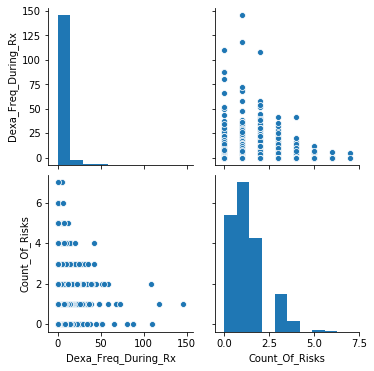

In [28]:
#Exploration of data

#Separating persistency and non-persistency patient in the data 
Persistency     = df[df["Persistency_Flag"] == "Persistent"]
not_Persistency = df[df["Persistency_Flag"] == "Non-Persistent"]


#function for pie plot for all category feature
def plot_pie(column) :
    
    trace1 = go.Pie(values  = Persistency[column].value_counts().values.tolist(),
                    labels  = Persistency[column].value_counts().keys().tolist(),
                    hoverinfo = "label+percent+name",
                    domain  = dict(x = [0,.48]),
                    name    = "Persistency patients",
                    marker  = dict(line = dict(width = 2,
                                               color = "rgb(243,243,243)")
                                  ),
                    hole    = .8
                   )
    trace2 = go.Pie(values  = not_Persistency[column].value_counts().values.tolist(),
                    labels  = not_Persistency[column].value_counts().keys().tolist(),
                    hoverinfo = "label+percent+name",
                    marker  = dict(line = dict(width = 2,
                                               color = "rgb(243,243,243)")
                                  ),
                    domain  = dict(x = [.52,1]),
                    hole    = .8,
                    name    = "Non Persistency patients" 
                   )


    layout = go.Layout(dict(title = column + " Distribution in Persistency diesase ",
                            plot_bgcolor  = "rgb(243,243,243)",
                            paper_bgcolor = "rgb(243,243,243)",
                            annotations = [dict(text = "Persistency patients",
                                                font = dict(size = 13),
                                                showarrow = False,
                                                x = .15, y = .5),
                                           dict(text = "Non Persistency patients",
                                                font = dict(size = 13),
                                                showarrow = False,
                                                x = .88,y = .5
                                               )
                                          ]
                           )
                      )
    data = [trace1,trace2]
    fig  = go.Figure(data = data,layout = layout)
    fig.update_layout(showlegend=False)
    py.iplot(fig)


#function  for histogram for customer attrition types
def histogram(column) :
    trace1 = go.Histogram(x  = Persistency[column],
                          histnorm= "percent",
                          name = "Persistency patients",
                          marker = dict(line = dict(width = .5,
                                                    color = "black"
                                                    )
                                        ),
                          nbinsx = 50,
                         opacity = .9 
                         ) 
    
    trace2 = go.Histogram(x  = not_Persistency[column],
                          histnorm = "percent",
                          name = "Non Persistency patients",
                          marker = dict(line = dict(width = .5, color= "black")),
                          nbinsx = 50,
                          opacity = .9
                         )
    
    data = [trace1,trace2]
    layout = go.Layout(dict(title =column + " distribution in Persistency patients ",
                            plot_bgcolor  = "rgb(243,243,243)",
                            paper_bgcolor = "rgb(243,243,243)",
                            xaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                             title = column,
                                             zerolinewidth=1,
                                             ticklen=5,
                                             gridwidth=2
                                            ),
                            yaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                             title = "percent",
                                             zerolinewidth=1,
                                             ticklen=5,
                                             gridwidth=2
                                            ),
                           )
                      )
    fig  = go.Figure(data=data,layout=layout)
    fig.update_layout(showlegend=False)
    py.iplot(fig)
    
#function  for scatter plot matrix  for numerical columns in data
def scatter_matrix(df):
    plt.figure(figsize=(10,10))
    sns.pairplot(df)

#for all categorical columns plot pie
for i in cat_columns:
    plot_pie(i)

#for all categorical columns plot histogram    
for i in num_columns:
    histogram(i)

#scatter plot matrix
scatter_matrix(df)

# Observation of the data form the visulization of the features
1. Gender distribution in both persistence and non persistence are same
2. % of Race distribution in both the class(persistence and non persistence are same)
3. % of Ethinicity distribution is same in both the class(persistence and non persistence are same)
4. Region distribution has different % of distribution accross class but not significant(after doing chi-squre test)
5  Age distribution also is same in both the class
6. Ntm_Speciality Distribution is different across Persistence and non_persistence 
7. Ntm_Specialist_Flag Distribution is different across both the class
8. Ntm_Speciality_Bucket Distribution is different in both the class
9.  % of Gluco_Record prior is same in both persistence and non_persistence
10. % of Gluco_Record_during_rx data for categorical attributes are little different in both the classes
11. % of Dexa_During_rx distribution is different in both the class
12. % of Frag_Frac_Prior_Ntm distributions are same in both the class
13. % Frag_Frac_During_Rx is little different in both the classes
14. There is no different in percentage of categorical attributes distribution in Risk_Segment_Prior_Ntm both the classes
15. TScore Bucket prior has same Y and N counts in both the classes of persistency
16. Risk_segment During_Rx has different distribution in categorical attributes 
17. Tscore_Bucket has different % of different treshold in both the classes of persistency
18. Change of T score distribution is different in all levels for both the classes of persistency
19. change risk segment distribution has little different % of distribution in both classes of persistency
20. Adherent Flag has almost same % of distribution for the both classes
21. Id_indicator have almost same % of distribution of categorical attributes in both class 
22. Injectable has same % of distribution of categorical attributes in both class
23. comborb_encontor has same distribution in both classes
24. Comborb_encounter_immunization has same distribution in both classes
25. comborb_Encontor_for_general_exam_w_o_complaing has also have same distribution of categorical in both the classes
26. comborb_vitamin_d_deficency has different distribution in categorical attributes in both the classes
27. Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified has different distribution in both the class of pesisteny
28. Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx has different distribution in both the classes
29. Comorb_Long_Term_Current_Drug_Therapy has different % of categorical attributes in both the classes
30. Comorb_Dorsalgia has different distribution of categorical attributes in both the class
31. Comorb_Personal_History_Of_Other_Diseases_And_Conditions has different % of categorical attributes distribution in both the class'
32. Comorb_Other_Disorders_Of_Bone_Density_And_Structure has different distribution of categorry present in both the classes of persistency
33. Comorb_Disorders_of_lipoprotein_metabolism_and_other_lipidemias has slitly different % of distribution in both the classes of persistency
34. Comorb_Osteoporosis_without_current_pathological_fracture has little different distribution in both the class of persistency
35. Comorb_Personal_history_of_malignant_neoplasm has different distribution in both class of persistency
36. Comorb_Gastro_esophageal_reflux_disease has also different % of distribution in both classes
37. Concom_Cholesterol_And_Triglyceride_Regulating_Preparations has little different distribution in bothe the classes of persistency 
38. Concom_Narcotics has different distribution of categorical has different distribution of categorical attributes in both the classes of persistency
39. Concom_Systemic_Corticosteroids_Plain has different distribution in categorical attribute in both classes of persistency
40. Concom_Anti_Depressants_And_Mood_Stabilisers has little different distribution of categorical attributes in both the classes of persistency
41. Concom_Fluoroquinolones has little different distribution of categorical attributes 
42. Concom_Cephalosporins has little different distribution of categorical attributes in two different classes of persistency
43. Concom_Macrolides_And_Similar_Types has different % of categorical distribution in two classes of persistency_flag
44. Concom_Broad_Spectrum_Penicillins has different distribution of categorical attributes in two classes of persistency
45. Concom_Anaesthetics_General has different categorical attribution in both the class of persistency
46. Concom_Viral_Vaccines has little different percentage of distribution of categorical attributes in both the classes of persistency columns
47. Risk_Type_1_Insulin_Dependent_Diabetes has almost same distribution in both the classes of persistency 
48. Risk_Osteogenesis_Imperfecta has almost same categorical attributes in both the class of persistency
49. Risk_Rheumatoid_Arthritis has almost has same categorical attributes in both the class of persistency
50. Risk_Untreated_Chronic_Hyperthyroidism has same categorical attributes in both the classes
51. Risk_Untreated_Chronic_Hypogonadism has same categorical attributes in both the classes of persistency
52. Risk_Untreated_Early_Menopause has same value for both the classes of persistency
53. Risk_Patient_Parent_Fractured_Their_Hip has the same distribution in both the classes of persistency
54. Risk_Smoking_Tobacco has little different percentage of categorical attribute distribution in both the class of persistency
55. Risk_Chronic_Malnutrition_Or_Malabsorption has almost same distribution of categorical distribution in both the classes of persistency
56. Risk_Chronic_Liver_Disease has same categorical attributes in both the classes of persistency
57. Risk_Family_History_Of_Osteoporosis has same distribution in both the classes of persistency
58. Risk_Low_Calcium_Intake has same ratio of distribution in both the classes of persistency
59. Risk_Vitamin_D_Insufficiency has little different distribution in both the classes of persistency
60. Risk_Poor_Health_Frailty has same distribution of categorical distribution in both the classes of persistency
61. Risk_Excessive_Thinness has same % of distribution of categorical distibution in bothe the classes of persistnecy
62. Risk_Hysterectomy_Oophorectomy has same % of distribution of categorical distibution in bothe the classes of persistnecy
63. Risk_Estrogen_Deficiency has same categorical attributes in both the class of persistency
64. Risk_Immobilization has same categorical attributes in both the class of persistency 
65. Risk_Recurring_Falls has almost same categorical attributes in both the class of perisistency


# After looking at the individual feature and how it is intracting with the    dependent variable we have found that we can categories the feature where the distribution is different, little different, same attribute in both the classes


# feature where the distribution of categorical attribution is same in both the      classes 
1.Gender distribution
2.Race distribution
3.Ethinicity distribution
4.Age distribution
5.Gluco_Recored
6.Frag_Frac_Prior_Ntm
7.Risk_Segment_Prior_Ntm
8.TScore Bucket prior
9.Adherent Flag
10.Id_indicator
11.Injectable
12.comborb_encontor
13.Comborb_encounter_immunization
14.comborb_Encontor_for_general_exam_w_o_complaing
15.Risk_Type_1_Insulin_Dependent_Diabetes
16.Risk_Osteogenesis_Imperfecta
17.Risk_Osteogenesis_Imperfecta
18.Risk_Rheumatoid_Arthritis
19.Risk_Untreated_Chronic_Hyperthyroidism
20.Risk_Untreated_Chronic_Hypogonadism
21.Risk_Untreated_Early_Menopause
22.Risk_Patient_Parent_Fractured_Their_Hip
23.Risk_Chronic_Malnutrition_Or_Malabsorption
24.Risk_Chronic_Liver_Disease
25.Risk_Family_History_Of_Osteoporosis
26.Risk_Low_Calcium_Intake
27.Risk_Poor_Health_Frailty
28.Risk_Excessive_Thinness
29.Risk_Hysterectomy_Oophorectomy
30.Risk_Estrogen_Deficiency
31.Risk_Immobilization
32.Risk_Recurring_Falls


# feature where the the distribution of categorical attributes are little different in    both the classes
1.Region distribution
2.Gluco_Record_during_rx
3.Frag_Frac_During_Rx
4.Comorb_Disorders_of_lipoprotein_metabolism_and_other_lipidemias
5.Comorb_Osteoporosis_without_current_pathological_fracture
6.Concom_Cholesterol_And_Triglyceride_Regulating_Preparations
7.Concom_Anti_Depressants_And_Mood_Stabilisers
8.Concom_Fluoroquinolones
9.Risk_Smoking_Tobacco
10.Risk_Vitamin_D_Insufficiency

In [29]:
df.head()

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
0,P1,Persistent,Male,Caucasian,Not Hispanic,West,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
1,P2,Non-Persistent,Male,Asian,Not Hispanic,West,55-65,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
2,P3,Non-Persistent,Female,Other/Unknown,Hispanic,Midwest,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,Y,N,N,N,N,N,N,N,2
3,P4,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,1
4,P5,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,1


In [34]:
pd.crosstab(df['Gender'],df['Persistency_Flag']).values
from scipy.stats import chi2_contingency

In [47]:
significant_feature = []
non_significant_feature = []
def chisquare_Test(i,data):
    stat, p, dof, expected = chi2_contingency(data)
    # select significance value
    alpha = 0.05
    # Determine whether to reject or keep your null hypothesis
    print('significance= {:.3f}, p= {:.3f}'.format(alpha, p))
    if p <= alpha:
        print('{} feature is associated with target variable (reject H0)'.format(i))
        significant_feature.append(i)
    else:
        print('{} feature is not associated(fail to reject H0)'.format(i))
        non_significant_feature.append(i)
        
        
for i in cat_columns:
    chisquare_Test(i,pd.crosstab(df['Persistency_Flag'],df[i]))
    
# printing the significant and non_significant feature 
print(len(significant_feature))
print(len(non_significant_feature))


significance= 0.050, p= 0.597
Gender feature is not associated(fail to reject H0)
significance= 0.050, p= 0.090
Race feature is not associated(fail to reject H0)
significance= 0.050, p= 0.368
Ethnicity feature is not associated(fail to reject H0)
significance= 0.050, p= 0.000
Region feature is associated with target variable (reject H0)
significance= 0.050, p= 0.275
Age_Bucket feature is not associated(fail to reject H0)
significance= 0.050, p= 0.000
Ntm_Speciality feature is associated with target variable (reject H0)
significance= 0.050, p= 0.000
Ntm_Specialist_Flag feature is associated with target variable (reject H0)
significance= 0.050, p= 0.000
Ntm_Speciality_Bucket feature is associated with target variable (reject H0)
significance= 0.050, p= 0.768
Gluco_Record_Prior_Ntm feature is not associated(fail to reject H0)
significance= 0.050, p= 0.000
Gluco_Record_During_Rx feature is associated with target variable (reject H0)
significance= 0.050, p= 0.000
Dexa_During_Rx feature is a

In [53]:
# after doing the chi-squ test for all the categorical variable we will only consider the significant variable
fn_df = df[significant_feature+num_columns+[target_column]]

# checking the final data 
fn_df.head()

,Region,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,Gluco_Record_During_Rx,Dexa_During_Rx,Frag_Frac_During_Rx,Risk_Segment_During_Rx,Tscore_Bucket_During_Rx,Change_T_Score,...,Risk_Untreated_Chronic_Hypogonadism,Risk_Smoking_Tobacco,Risk_Chronic_Malnutrition_Or_Malabsorption,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Immobilization,Dexa_Freq_During_Rx,Count_Of_Risks,Persistency_Flag
0,West,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,N,N,VLR_LR,<=-2.5,No change,...,N,N,N,N,N,N,N,0,0,Persistent
1,West,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,N,N,Unknown,Unknown,Unknown,...,N,N,N,N,N,N,N,0,0,Non-Persistent
2,Midwest,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,N,N,HR_VHR,<=-2.5,No change,...,N,N,N,N,N,N,N,0,2,Non-Persistent
3,Midwest,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,Y,N,N,HR_VHR,<=-2.5,No change,...,N,Y,N,N,N,N,N,0,1,Non-Persistent
4,Midwest,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,Y,N,N,Unknown,Unknown,Unknown,...,N,Y,N,N,N,N,N,0,1,Non-Persistent


In [59]:
#checking the cardinality of the data for all the categorical feature
for i in significant_feature:
    print('the total number of levels are {0} unique attributes of {1} column is {2}'.format(fn_df[i].nunique(),i,fn_df[i].unique()))

the total number of levels are 5 unique attributes of Region column is ['West' 'Midwest' 'South' 'Other/Unknown' 'Northeast']
the total number of levels are 36 unique attributes of Ntm_Speciality column is ['GENERAL PRACTITIONER' 'Unknown' 'ENDOCRINOLOGY' 'RHEUMATOLOGY'
 'ONCOLOGY' 'PATHOLOGY' 'OBSTETRICS AND GYNECOLOGY'
 'PSYCHIATRY AND NEUROLOGY' 'ORTHOPEDIC SURGERY'
 'PHYSICAL MEDICINE AND REHABILITATION' 'SURGERY AND SURGICAL SPECIALTIES'
 'PEDIATRICS' 'PULMONARY MEDICINE' 'HEMATOLOGY & ONCOLOGY' 'UROLOGY'
 'PAIN MEDICINE' 'NEUROLOGY' 'RADIOLOGY' 'GASTROENTEROLOGY'
 'EMERGENCY MEDICINE' 'PODIATRY' 'OPHTHALMOLOGY' 'OCCUPATIONAL MEDICINE'
 'TRANSPLANT SURGERY' 'PLASTIC SURGERY' 'CLINICAL NURSE SPECIALIST'
 'OTOLARYNGOLOGY' 'HOSPITAL MEDICINE' 'ORTHOPEDICS' 'NEPHROLOGY'
 'GERIATRIC MEDICINE' 'HOSPICE AND PALLIATIVE MEDICINE'
 'OBSTETRICS & OBSTETRICS & GYNECOLOGY & OBSTETRICS & GYNECOLOGY'
 'VASCULAR SURGERY' 'CARDIOLOGY' 'NUCLEAR MEDICINE']
the total number of levels are 2 unique att

In [57]:
# As we can see the most cardinality the only variable we have is Ntm_Speciality so we will consider
# target mean encoding or frequency enconding
fn_df.groupby('Ntm_Speciality')['Ntm_Speciality'].count().sort_values(ascending =False)

Ntm_Speciality
GENERAL PRACTITIONER                                              1535
RHEUMATOLOGY                                                       604
ENDOCRINOLOGY                                                      458
Unknown                                                            310
ONCOLOGY                                                           225
OBSTETRICS AND GYNECOLOGY                                           90
UROLOGY                                                             33
ORTHOPEDIC SURGERY                                                  30
CARDIOLOGY                                                          22
PATHOLOGY                                                           16
HEMATOLOGY & ONCOLOGY                                               14
OTOLARYNGOLOGY                                                      14
PEDIATRICS                                                          13
PHYSICAL MEDICINE AND REHABILITATION                          

In [68]:
# function to do one hot encoding 
def one_hot_encoder(column):
    fn_df[column] = pd.get_dummies(fn_df,column,drop_first = True)

    
    
# first considering only the feature which has 2 levle of categorical attributes
for i in significant_feature:
    if fn_df[i].nunique()==2:
        one_hot_encoder(i)

# converting the target variable to o's and 1's 
fn_df['Persistency_Flag'] = fn_df['Persistency_Flag'].map({'Non-Persistent':0,'Persistent':1})

In [71]:
# checking the encod
pd.set_option('max_columns',80)
fn_df.head()

,Region,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,Gluco_Record_During_Rx,Dexa_During_Rx,Frag_Frac_During_Rx,Risk_Segment_During_Rx,Tscore_Bucket_During_Rx,Change_T_Score,Change_Risk_Segment,Adherent_Flag,Idn_Indicator,Injectable_Experience_During_Rx,Comorb_Encounter_For_Screening_For_Malignant_Neoplasms,Comorb_Encounter_For_Immunization,"Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx",Comorb_Vitamin_D_Deficiency,Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified,Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx,Comorb_Long_Term_Current_Drug_Therapy,Comorb_Dorsalgia,Comorb_Personal_History_Of_Other_Diseases_And_Conditions,Comorb_Other_Disorders_Of_Bone_Density_And_Structure,Comorb_Disorders_of_lipoprotein_metabolism_and_other_lipidemias,Comorb_Osteoporosis_without_current_pathological_fracture,Comorb_Personal_history_of_malignant_neoplasm,Comorb_Gastro_esophageal_reflux_disease,Concom_Cholesterol_And_Triglyceride_Regulating_Preparations,Concom_Narcotics,Concom_Systemic_Corticosteroids_Plain,Concom_Anti_Depressants_And_Mood_Stabilisers,Concom_Fluoroquinolones,Concom_Cephalosporins,Concom_Macrolides_And_Similar_Types,Concom_Broad_Spectrum_Penicillins,Concom_Anaesthetics_General,Concom_Viral_Vaccines,Risk_Rheumatoid_Arthritis,Risk_Untreated_Chronic_Hypogonadism,Risk_Smoking_Tobacco,Risk_Chronic_Malnutrition_Or_Malabsorption,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Immobilization,Dexa_Freq_During_Rx,Count_Of_Risks,Persistency_Flag
0,West,GENERAL PRACTITIONER,0,OB/GYN/Others/PCP/Unknown,0,0,0,VLR_LR,<=-2.5,No change,Unknown,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Persistent
1,West,GENERAL PRACTITIONER,0,OB/GYN/Others/PCP/Unknown,0,0,0,Unknown,Unknown,Unknown,Unknown,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Non-Persistent
2,Midwest,GENERAL PRACTITIONER,0,OB/GYN/Others/PCP/Unknown,0,0,0,HR_VHR,<=-2.5,No change,No change,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,Non-Persistent
3,Midwest,GENERAL PRACTITIONER,0,OB/GYN/Others/PCP/Unknown,0,0,0,HR_VHR,<=-2.5,No change,No change,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,Non-Persistent
4,Midwest,GENERAL PRACTITIONER,0,OB/GYN/Others/PCP/Unknown,0,0,0,Unknown,Unknown,Unknown,Unknown,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,Non-Persistent


In [81]:
# for Ntm_Speciality feature we will perform frequecy encoding
fn_df['Ntm_Speciality']=ce.TargetEncoder().fit_transform(fn_df['Ntm_Speciality'],fn_df['Persistency_Flag'])

In [82]:
fn_df.head()

,Region,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,Gluco_Record_During_Rx,Dexa_During_Rx,Frag_Frac_During_Rx,Risk_Segment_During_Rx,Tscore_Bucket_During_Rx,Change_T_Score,Change_Risk_Segment,Adherent_Flag,Idn_Indicator,Injectable_Experience_During_Rx,Comorb_Encounter_For_Screening_For_Malignant_Neoplasms,Comorb_Encounter_For_Immunization,"Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx",Comorb_Vitamin_D_Deficiency,Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified,Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx,Comorb_Long_Term_Current_Drug_Therapy,Comorb_Dorsalgia,Comorb_Personal_History_Of_Other_Diseases_And_Conditions,Comorb_Other_Disorders_Of_Bone_Density_And_Structure,Comorb_Disorders_of_lipoprotein_metabolism_and_other_lipidemias,Comorb_Osteoporosis_without_current_pathological_fracture,Comorb_Personal_history_of_malignant_neoplasm,Comorb_Gastro_esophageal_reflux_disease,Concom_Cholesterol_And_Triglyceride_Regulating_Preparations,Concom_Narcotics,Concom_Systemic_Corticosteroids_Plain,Concom_Anti_Depressants_And_Mood_Stabilisers,Concom_Fluoroquinolones,Concom_Cephalosporins,Concom_Macrolides_And_Similar_Types,Concom_Broad_Spectrum_Penicillins,Concom_Anaesthetics_General,Concom_Viral_Vaccines,Risk_Rheumatoid_Arthritis,Risk_Untreated_Chronic_Hypogonadism,Risk_Smoking_Tobacco,Risk_Chronic_Malnutrition_Or_Malabsorption,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Immobilization,Dexa_Freq_During_Rx,Count_Of_Risks,Persistency_Flag
0,West,0.321824,0,OB/GYN/Others/PCP/Unknown,0,0,0,VLR_LR,<=-2.5,No change,Unknown,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,West,0.321824,0,OB/GYN/Others/PCP/Unknown,0,0,0,Unknown,Unknown,Unknown,Unknown,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Midwest,0.321824,0,OB/GYN/Others/PCP/Unknown,0,0,0,HR_VHR,<=-2.5,No change,No change,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0
3,Midwest,0.321824,0,OB/GYN/Others/PCP/Unknown,0,0,0,HR_VHR,<=-2.5,No change,No change,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,Midwest,0.321824,0,OB/GYN/Others/PCP/Unknown,0,0,0,Unknown,Unknown,Unknown,Unknown,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [84]:
# checking the remaing feature which are still in categorical format
for i in fn_df.columns:
    if fn_df[i].dtypes==object:
        print('the cardinality of the feature {} are {}'.format(i,fn_df[i].unique()))

the cardinality of the feature Region are ['West' 'Midwest' 'South' 'Other/Unknown' 'Northeast']
the cardinality of the feature Ntm_Speciality_Bucket are ['OB/GYN/Others/PCP/Unknown' 'Endo/Onc/Uro' 'Rheum']
the cardinality of the feature Risk_Segment_During_Rx are ['VLR_LR' 'Unknown' 'HR_VHR']
the cardinality of the feature Tscore_Bucket_During_Rx are ['<=-2.5' 'Unknown' '>-2.5']
the cardinality of the feature Change_T_Score are ['No change' 'Unknown' 'Worsened' 'Improved']
the cardinality of the feature Change_Risk_Segment are ['Unknown' 'No change' 'Worsened' 'Improved']


In [85]:
# AS we can see the Change_Risk_Segment and Change_T_score can be converted to int using ordinal
# encoding

mapped_value = {'Unknown':1,'Worsened':2,'No change':3,'Improved':4}

# considering Change_T_Score and Change_Risk_Segment for feature encoding
fn_df['Change_T_Score'] = fn_df['Change_T_Score'].map(mapped_value)
fn_df['Change_Risk_Segment'] = fn_df['Change_Risk_Segment'].map(mapped_value)

In [86]:
# checking the remaing feature which are still in categorical format
for i in fn_df.columns:
    if fn_df[i].dtypes==object:
        print('the cardinality of the feature {} are {}'.format(i,fn_df[i].unique()))

the cardinality of the feature Region are ['West' 'Midwest' 'South' 'Other/Unknown' 'Northeast']
the cardinality of the feature Ntm_Speciality_Bucket are ['OB/GYN/Others/PCP/Unknown' 'Endo/Onc/Uro' 'Rheum']
the cardinality of the feature Risk_Segment_During_Rx are ['VLR_LR' 'Unknown' 'HR_VHR']
the cardinality of the feature Tscore_Bucket_During_Rx are ['<=-2.5' 'Unknown' '>-2.5']


In [87]:
# AS we can see the  Tscore_Bucket_During_Rx can be converted to int using ordinal
# encoding

mapped_value = {'<=-2.5':2,'Unknown':1,'>-2.5':3}

# considering Tscore_Bucket_During_Rx for feature encoding
fn_df['Tscore_Bucket_During_Rx'] = fn_df['Tscore_Bucket_During_Rx'].map(mapped_value)

In [117]:
# AS we can see the  Tscore_Bucket_During_Rx can be converted to int using ordinal
# encoding

mapped_value = {'VLR_LR':1,'Unknown':0,'HR_VHR':2}

# considering Tscore_Bucket_During_Rx for feature encoding
fn_df['Risk_Segment_During_Rx'] = fn_df['Risk_Segment_During_Rx'].map(mapped_value)

In [88]:
# function to do one hot encoding 
def one_hot_encoder(column):
    fn_df[column] = pd.get_dummies(fn_df,column)
    

    # first considering only the feature which has 2 levle of categorical attributes
for i in ['Region','Ntm_Speciality_Bucket']:
    one_hot_encoder(i)

In [118]:
# checking the final data after doing feature enginnering
fn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3424 entries, 0 to 3423
Data columns (total 49 columns):
 #   Column                                                              Non-Null Count  Dtype  
---  ------                                                              --------------  -----  
 0   Region                                                              3424 non-null   float64
 1   Ntm_Speciality                                                      3424 non-null   float64
 2   Ntm_Specialist_Flag                                                 3424 non-null   int64  
 3   Ntm_Speciality_Bucket                                               3424 non-null   float64
 4   Gluco_Record_During_Rx                                              3424 non-null   int64  
 5   Dexa_During_Rx                                                      3424 non-null   int64  
 6   Frag_Frac_During_Rx                                                 3424 non-null   int64  
 7   Risk_Segment_Du

In [119]:
# seperating data into the independent feature and dependent feature
X = fn_df.loc[:,fn_df.columns != 'Persistency_Flag']
Y = fn_df.loc[:,'Persistency_Flag']

# spliting the data into train and test 
X_train, X_test, Y_train, Y_test = train_test_split(X,Y ,random_state=42, test_size = .2,stratify= Y)

In [120]:
# building first model logistic regression
lr = LogisticRegression()

# fitting logistic regression
lr_model = lr.fit(X_train,Y_train)

In [154]:
# creating a function to show all the metrics for the model and performance
def model_eval(model):
    prediction = model.predict(X_test)
    print('Accuracy of the model is\n {}'.format(accuracy_score(Y_test,prediction)))
    print('precision of the model is\n {}'.format(precision_score(Y_test,prediction)))
    print('recall of the model is\n {}\n'.format(recall_score(Y_test,prediction)))
    print(classification_report(Y_test,prediction))
    print('Confusion maxtric is\n {}'.format(confusion_matrix(Y_test,RF_final.predict(X_test))))
    
# calling the function 
model_eval(lr_model)

Accuracy of the model is
 0.7708029197080292
precision of the model is
 0.8258064516129032
recall of the model is
 0.49612403100775193

              precision    recall  f1-score   support

           0       0.75      0.94      0.84       427
           1       0.83      0.50      0.62       258

    accuracy                           0.77       685
   macro avg       0.79      0.72      0.73       685
weighted avg       0.78      0.77      0.75       685

Confusion maxtric is
 [[393  34]
 [118 140]]


In [134]:
# will be using regulazation for logistic regression

parameters ={
    'C' : np.logspace(-4,4,5)
}

f_scorer = make_scorer(f1_score,average = 'macro' )

Grid_Search = GridSearchCV(lr,param_grid = parameters,scoring = f_scorer,cv = 5)

Grid_Search.fit(X_train,Y_train)

print("Best parameters from gridsearch: {}".format(Grid_Search.best_params_))
print("CV score=%0.3f" % Grid_Search.best_score_)

Best parameters from gridsearch: {'C': 0.01}
CV score=0.725


In [135]:
# we see that the best regulazation is 0.01

lr_reg = LogisticRegression(**Grid_Search.best_params_)
lr_reg.fit(X_train,Y_train)

# checking the performance of the model which has fit using logistic regression
model_eval(lr_reg)

Accuracy of the model is
 0.7605839416058394
precision of the model is
 0.8309859154929577
recall of the model is
 0.4573643410852713

              precision    recall  f1-score   support

           0       0.74      0.94      0.83       427
           1       0.83      0.46      0.59       258

    accuracy                           0.76       685
   macro avg       0.79      0.70      0.71       685
weighted avg       0.78      0.76      0.74       685



In [141]:
# creating the decison tree 
Dt = DecisionTreeClassifier()


# defining the hyperparemeter for decision tree

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Criteria of chossing a node
criterion=['gini','entropy']
# Create the random grid
random_grid = {
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'criterion':criterion,
               'min_samples_leaf': min_samples_leaf,
                }

DT_grid_search = GridSearchCV(estimator = Dt,param_grid  = random_grid,scoring = f_scorer, cv = 5, verbose=2, n_jobs = -1)

DT_grid_search.fit(X_train,Y_train)

print("Best parameters from gridsearch: {}".format(DT_grid_search.best_params_))
print("CV score=%0.3f" % DT_grid_search.best_score_)

Fitting 5 folds for each of 198 candidates, totalling 990 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   27.0s
[Parallel(n_jobs=-1)]: Done 468 tasks      | elapsed:   33.5s


Best parameters from gridsearch: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10}
CV score=0.736


[Parallel(n_jobs=-1)]: Done 990 out of 990 | elapsed:   42.0s finished


In [142]:
# fitting the decision tree with the best parameter with the gridsearch CV
DT_final = DecisionTreeClassifier(**DT_grid_search.best_params_)

# fitting the Decision tree with the best parameter 
DT_final.fit(X_train,Y_train)

# checking the performance of the model
model_eval(DT_final)

Accuracy of the model is
 0.7751824817518248
precision of the model is
 0.7988505747126436
recall of the model is
 0.5387596899224806

              precision    recall  f1-score   support

           0       0.77      0.92      0.84       427
           1       0.80      0.54      0.64       258

    accuracy                           0.78       685
   macro avg       0.78      0.73      0.74       685
weighted avg       0.78      0.78      0.76       685



In [144]:
# working  with ensemble techique Random Forest classifier
Rf = RandomForestClassifier()


# defining the hyperparameter for random forest 

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 500, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Criteria of chossing a node
criterion=['gini','entropy']
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'criterion':criterion,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap
              }


# Use the random grid to search for best hyperparameters
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
Rf_random = GridSearchCV(estimator = Rf, param_grid = random_grid,cv = 5, verbose=2,  n_jobs = -1)
# Fit the random search model
Rf_random.fit(X_train, Y_train)

# printing the best parameter and best score after training with GridSearchCV
print("Best parameters from gridsearch: {}".format(Rf_random.best_params_))
print("CV score=%0.3f" % Rf_random.best_score_)


Fitting 5 folds for each of 7920 candidates, totalling 39600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   22.2s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  9.6min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed: 14.1min
[Parallel(n_jobs=-1)]: Done 1977 tasks      | elapsed: 19.2min
[Parallel(n_jobs=-1)]: Done 2584 tasks      | elapsed: 25.4min
[Parallel(n_jobs=-1)]: Done 3273 tasks      | elapsed: 32.3min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed: 40.1min
[Parallel(n_jobs=-1)]: Done 4893 tasks      | elapsed: 49.4min
[Parallel(n_jobs=-1)]: Done 5824 tasks      | elapsed: 58.6min
[Parallel(n_jobs=-1)]: Done 6837 tasks      | elapsed: 68.7min
[Parallel(n_jobs=-1)]: Done 7930 tasks      | elapsed: 79.6min
[Parallel(n_jobs=-1)]: Done 9105 tasks      | 

Best parameters from gridsearch: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 144}
CV score=0.790


In [145]:
# fitting the Random forest tree with the best parameter with the gridsearch CV
RF_final = RandomForestClassifier(**Rf_random.best_params_)

# fitting the Random forest tree with the best parameter 
RF_final.fit(X_train,Y_train)

# checking the performance of the model
model_eval(RF_final)

Accuracy of the model is
 0.7781021897810219
precision of the model is
 0.8045977011494253
recall of the model is
 0.5426356589147286

              precision    recall  f1-score   support

           0       0.77      0.92      0.84       427
           1       0.80      0.54      0.65       258

    accuracy                           0.78       685
   macro avg       0.79      0.73      0.74       685
weighted avg       0.78      0.78      0.77       685



In [146]:
# Trying boositing algorithm 


gbdt = GradientBoostingClassifier()
parameters = {
    "n_estimators":[5,50,250,300],
    "max_depth":[1,3,5,7,9],
    "learning_rate":[0.01,0.1,1,10,100]}

GB_grid_search = GridSearchCV(gbdt,parameters,cv=5)
GB_grid_search.fit(X_train,Y_train)


# printing the best parameter and best score after training with GridSearchCV
print("Best parameters from gridsearch: {}".format(GB_grid_search.best_params_))
print("CV score=%0.3f" % GB_grid_search.best_score_)

Best parameters from gridsearch: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300}
CV score=0.789


In [155]:
# fitting the decision tree with the best parameter with the gridsearch CV
GBDT_final = GradientBoostingClassifier(**GB_grid_search.best_params_)

# fitting the Decision tree with the best parameter 
GBDT_final.fit(X_train,Y_train)

# checking the performance of the model
model_eval(GBDT_final)

Accuracy of the model is
 0.7781021897810219
precision of the model is
 0.83125
recall of the model is
 0.5155038759689923

              precision    recall  f1-score   support

           0       0.76      0.94      0.84       427
           1       0.83      0.52      0.64       258

    accuracy                           0.78       685
   macro avg       0.80      0.73      0.74       685
weighted avg       0.79      0.78      0.76       685

Confusion maxtric is
 [[393  34]
 [118 140]]


In [ ]:
# after using bagging and boosting and seeing the model we can see bagging has better in terms of recall and precision
# we will choose randomforestclassifier as our final model

In [149]:
confusion_matrix(Y_test,RF_final.predict(X_test))

array([[393,  34],
       [118, 140]], dtype=int64)

In [159]:
# checking the roc_auc_score  for random forest 
RF_predict_probab = RF_final.predict_proba(X_test)[:,1]
Roc_Auc_score = roc_auc_score(Y_test,RF_predict_probab)
print('the ROC and AUC score of the random forest is \n{}'.format(Roc_Auc_score))

the ROC and AUC score of the random forest is 
0.7986493110397037
